In [1]:
import lightgbm

print(lightgbm.__version__)

3.3.2


#### LoghtGBM 적용 - 위스콘신 Breast Cancer Prediction

In [3]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이트 추출
X_train, X_test, y_train, y_test = train_test_split(ftr, target, test_size=0.1, random_state=156)

# 앞서 XGboost와 동일하게 n_estimators는 400tjfwjd
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# LightGBM도 XGBoost와 동일하게 조기 중산 수행 가능
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

C:\Users\jx778\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\jx778\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's binary_logloss: 0.566257
[2]	valid_0's binary_logloss: 0.512086
[3]	valid_0's binary_logloss: 0.46283
[4]	valid_0's binary_logloss: 0.42183
[5]	valid_0's binary_logloss: 0.38844
[6]	valid_0's binary_logloss: 0.359048
[7]	valid_0's binary_logloss: 0.335033
[8]	valid_0's binary_logloss: 0.307119
[9]	valid_0's binary_logloss: 0.289233
[10]	valid_0's binary_logloss: 0.271619
[11]	valid_0's binary_logloss: 0.253648
[12]	valid_0's binary_logloss: 0.24066
[13]	valid_0's binary_logloss: 0.226677
[14]	valid_0's binary_logloss: 0.216104
[15]	valid_0's binary_logloss: 0.202985
[16]	valid_0's binary_logloss: 0.192317
[17]	valid_0's binary_logloss: 0.181687
[18]	valid_0's binary_logloss: 0.174502
[19]	valid_0's binary_logloss: 0.166488
[20]	valid_0's binary_logloss: 0.164217
[21]	valid_0's binary_logloss: 0.15868
[22]	valid_0's binary_logloss: 0.15107
[23]	valid_0's binary_logloss: 0.146516
[24]	valid_0's binary_logloss: 0.1414
[25]	valid_0's binary_logloss: 0.134665
[26]	valid_0's bi

In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

# 수정된 get_clf_eval() 함수 
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [5]:
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[17  1]
 [ 1 38]]
정확도: 0.9649, 정밀도: 0.9744, 재현율: 0.9744,    F1: 0.9744, AUC:0.9957


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

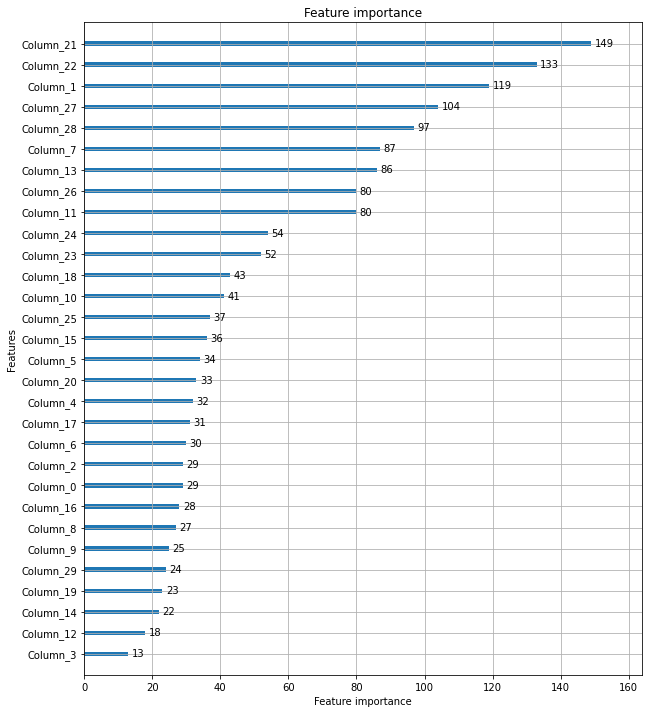

In [6]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper, ax=ax)

In [7]:
print(dataset.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
